In [2]:
import project_path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [3]:
%load_ext autoreload
%autoreload 2

**Goal**: Inspect how good are the answers of model and humans.

In [4]:
df_codegen = pd.read_csv('../data/annotations/2022-09-01/codegen.csv')
df_humans = pd.read_csv('../data/annotations/2022-09-01/participants_eye.csv')

In [9]:
df_humans['base_task'] = df_humans['Filename'].apply(lambda x: x.split('.')[0])
df_humans['language'] = df_humans['Filename'].apply(lambda x: x.split('.')[1])
df_humans.head()

,ID,unique_data_id,user,task_number,Filename,answer,Annotator 1 (Matteo),A1 - Completeness,A1 - Correctness,A1 - Intelligibility,Annotator 2 (Albert),Annotator 3,base_task,language
0,9,b0172f,UquarterU,0,hannoi_Q1.cpp,hannoi_Q1.cpp\n# Questions: How does the algor...,5.0,NaN,NaN,NaN,3.0,NaN,hannoi_Q1,cpp
1,19,c35fdf,UmonkU,0,hannoi_Q1.cpp,hannoi_Q1.cpp\n# Questions: How does the algor...,5.0,NaN,NaN,NaN,3.0,NaN,hannoi_Q1,cpp
2,31,300bd1,UdragonU,1,hannoi_Q1.cpp,hannoi_Q1.cpp\n# Questions: How does the algor...,4.0,NaN,NaN,NaN,2.0,NaN,hannoi_Q1,cpp
3,43,155d45,UDuckU,0,hannoi_Q1.cs,hannoi_Q1.cs\n# Questions: How does the algori...,4.0,NaN,NaN,NaN,NaN,NaN,hannoi_Q1,cs
4,51,44d4f6,UboatU,0,hannoi_Q1.cs,hannoi_Q1.cs\n# Questions: How does the algori...,5.0,NaN,NaN,NaN,NaN,NaN,hannoi_Q1,cs


In [7]:
df_codegen['base_task'] = df_codegen['filename'].apply(lambda x: x.split('.')[0])
df_codegen['language'] = df_codegen['filename'].apply(lambda x: x.split('.')[1].split('_')[0])
df_codegen.head()

,ID,filename,model_name,n_try,answer,Annotator 1 (Matteo),Unnamed: 6,Unnamed: 7,Unnamed: 8,Annotator 2 (Albert),Annotator 3,base_task,language
0,4,hannoi_Q1.cpp_0_Salesforce_codegen-16B-multi,unkown,0,hannoi_Q1.cpp_0_Salesforce_codegen-16B-multi\n...,3.0,NaN,NaN,NaN,NaN,NaN,hannoi_Q1,cpp
1,5,hannoi_Q1.cpp_1_Salesforce_codegen-16B-multi,unkown,1,hannoi_Q1.cpp_1_Salesforce_codegen-16B-multi\n...,4.0,NaN,NaN,NaN,NaN,NaN,hannoi_Q1,cpp
2,6,hannoi_Q1.cpp_2_Salesforce_codegen-16B-multi,unkown,2,hannoi_Q1.cpp_2_Salesforce_codegen-16B-multi\n...,4.0,NaN,NaN,NaN,NaN,NaN,hannoi_Q1,cpp
3,10,hannoi_Q1.cs_0_Salesforce_codegen-16B-multi,unkown,0,hannoi_Q1.cs_0_Salesforce_codegen-16B-multi\nQ...,3.0,NaN,NaN,NaN,NaN,NaN,hannoi_Q1,cs
4,32,hannoi_Q1.cs_1_Salesforce_codegen-16B-multi,unkown,1,hannoi_Q1.cs_1_Salesforce_codegen-16B-multi\nQ...,4.0,NaN,NaN,NaN,NaN,NaN,hannoi_Q1,cs


<AxesSubplot:xlabel='count', ylabel='base_task'>

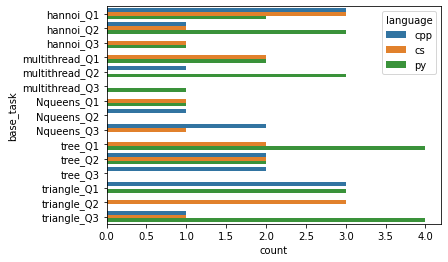

In [12]:
sns.countplot(
    data=df_humans,
    y='base_task',
    hue='language',
)

Annotator 1 (Matteo)


Text(0.5, 1.0, 'Codegen')

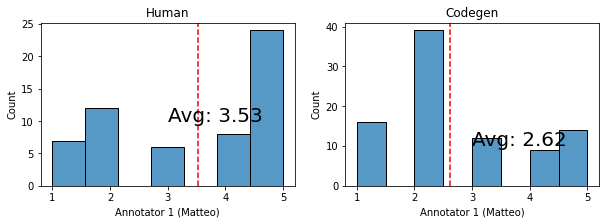

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

ax_human = axes[0]
ax_codegen = axes[1]
col_annotator = 'Annotator 1 (Matteo)'
print(col_annotator)
sns.histplot(
    data=df_humans,
    x=col_annotator,
    ax=ax_human,
)
# compute the average
avg = df_humans[col_annotator].mean()
ax_human.axvline(avg, color='r', linestyle='--')
ax_human.text(x=3, y=10, s=f"Avg: {avg:.2f}", fontsize=20)
ax_human.set_title('Human')

sns.histplot(
    data=df_codegen,
    x=col_annotator,
    ax=ax_codegen,
)
# compute the average
avg = df_codegen[col_annotator].mean()
ax_codegen.axvline(avg, color='r', linestyle='--')
ax_codegen.text(x=3, y=10, s=f"Avg: {avg:.2f}", fontsize=20)
ax_codegen.set_title('Codegen')

Annotator 2 (Albert)


Text(0.5, 1.0, 'Human')

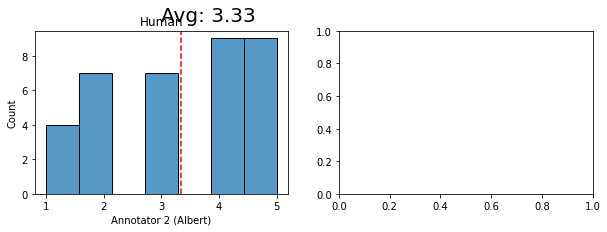

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

ax_human = axes[0]
ax_codegen = axes[1]
col_annotator = 'Annotator 2 (Albert)'
print(col_annotator)
sns.histplot(
    data=df_humans,
    x=col_annotator,
    ax=ax_human,
)
# compute the average
avg = df_humans[col_annotator].mean()
ax_human.axvline(avg, color='r', linestyle='--')
ax_human.text(x=3, y=10, s=f"Avg: {avg:.2f}", fontsize=20)
ax_human.set_title('Human')